# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Edward Nicholas Wijaya
- **Email:** edwardnicholas.wijaya.sekolah@gmail.com
- **ID Dicoding:** edwardnicholaswijaya

## Menentukan Pertanyaan Bisnis

- Apakah musim dan kondisi cuaca yang menghasilkan paling banyak penyewa selama ini?
- Bagaimanakah perbandingan rental di hari kerja dan hari libur sampai sejauh ini?
- Bagaimana pembagian total penyewaan sepeda antara pagi sampai malam? (Analisis lanjutan)

## Import Semua Packages/Library yang Digunakan

numpy dan pandas library untuk analisis data

matplotlib dan seaborn untuk visualisasi data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Ubah dataset jadi dataframe dengan pandas**

In [2]:
daily_df = pd.read_csv('data/day.csv')
hourly_df = pd.read_csv('data/hour.csv')

**Cek hasil dataframe**

In [3]:
daily_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hourly_df.head(60)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Ada 2 dataset, day_csv (daily_df) dan hour_csv (hourly_df)
- daily_df mengandung 16 kolom
- hourly_df mengandung 17 kolom, 16 sama persis dengan daily_df, dan 1 kolom tambahan yaitu hr
- Nama kolom kurang sesuai karena diperpendek berlebihan, atau tidak berhubungan sama sekali
- Data type kebanyakan numbers, bisa integer dan float, tapi juga ada data tanggal

### Assessing Data

**Cek dataframe daily_df**

In [5]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
daily_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
daily_df.duplicated().sum()

np.int64(0)

**Check dataframe hourly_df**

In [9]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hourly_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
hourly_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hourly_df.duplicated().sum()

np.int64(0)

**Insight:**
- Kedua dataset tidak ada data yang hilang, tidak akurat, atau duplicate
- Beberapa kolom bisa di rename supaya lebih jelas:
  - instant -> index
  - dteday -> date
  - yr -> year
  - mnth -> month
  - hr (hourly_df) -> hour
  - weathersit -> weather_stuation
  - atemp -> feeling_temp
  - hum -> humidity
  - cnt -> total
- Data type dteday ternyata string, harus diganti ke data type date
- Reformat kolom season, holiday, weekday, workingday, dan weather_situation menggunakan label menggantikan angka

### Cleaning Data

**Rename kolom daily_df**

In [13]:
daily_df.rename(columns={
    'instant': 'index',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'atemp': 'feeling_temp',
    'hum': 'humidity',
    'cnt': 'total',
}, inplace=True)

**Renami kolom hourly_df**

In [14]:
hourly_df.rename(columns={
    'instant': 'index',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'hr': 'hour',
    'atemp': 'feeling_temp',
    'hum': 'humidity',
    'cnt': 'total',
}, inplace=True)

**Ubah data type kolom date menjadi date di kedua dataframe**

In [15]:
daily_df['date'] = pd.to_datetime(daily_df['date'])

In [16]:
hourly_df['date'] = pd.to_datetime(hourly_df['date'])

**Ubah nilai kolom season dengan label supaya lebih mudah dimengerti**
- 1: spring
- 2: summer
- 3: fall
- 4: winter

In [17]:
daily_df['season'] = daily_df['season'].apply(
    lambda x: 
    'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else'winter' if x == 4 else np.nan
)

In [18]:
hourly_df['season'] = hourly_df['season'].apply(
    lambda x: 
    'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else'winter' if x == 4 else np.nan
)

**Ubah nilai kolom holiday dengan True/False supaya lebih mudah dimengerti**
- 0: False
- 1: True

In [19]:
daily_df['holiday'] = daily_df['holiday'].apply(
    lambda x:
    True if x == 1 else False if x == 0 else np.nan
)

In [20]:
hourly_df['holiday'] = hourly_df['holiday'].apply(
    lambda x:
    True if x == 1 else False if x == 0 else np.nan
)

**Ubah nilai kolom weekday dengan nama hari itu supaya lebih mudah dimengerti**
- 0: Sunday
- 1: Monday
- 2: Tuesday
- 3: Wednesday
- 4: Thurstday
- 5: Friday
- 6: Saturday

In [21]:
daily_df['weekday'] = daily_df['weekday'].apply(
    lambda x:
    'Sunday' if x == 0 else 'Monday' if x == 1 else 'Tuesday' if x == 2 else 'Wednesday' if x == 3 else 
    'Thursday' if x == 4 else 'Friday' if x == 5 else 'Saturday' if x == 6 else np.nan
)

In [22]:
hourly_df['weekday'] = hourly_df['weekday'].apply(
    lambda x:
    'Sunday' if x == 0 else 'Monday' if x == 1 else 'Tuesday' if x == 2 else 'Wednesday' if x == 3 else 
    'Thursday' if x == 4 else 'Friday' if x == 5 else 'Saturday' if x == 6 else np.nan
)

**Reformat workingday column values in daily_df and hourly_df into True/False for better understandability**
- 0: False
- 1: True

In [23]:
daily_df['workingday'] = daily_df['workingday'].apply(
    lambda x:
    True if x == 1 else False if x == 0 else np.nan
)

In [24]:
hourly_df['workingday'] = hourly_df['workingday'].apply(
    lambda x:
    True if x == 1 else False if x == 0 else np.nan
)

**Ubah nilai kolom weather_situation dengan True/False supaya lebih mudah dimengerti**
- 1. clear
- 2. cloudy/mist
- 3. light rain/snow
- 4. heavy rain/Ice

In [25]:
daily_df['weather_situation'] = daily_df['weather_situation'].apply(
    lambda x:
    'clear' if x == 1 else 'cloudy/mist' if x == 2 else 'light rain/snow' if x == 3 else 'heavy rain/ice' if x == 4 else np.nan
)

In [26]:
hourly_df['weather_situation'] = hourly_df['weather_situation'].apply(
    lambda x:
    'clear' if x == 1 else 'cloudy/mist' if x == 2 else 'light rain/snow' if x == 3 else 'heavy rain/ice' if x == 4 else np.nan
)

**Mengecek hasil cleaning**

In [27]:
daily_df.head(10)

,index,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,feeling_temp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,spring,0,1,False,Saturday,False,cloudy/mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,False,Sunday,False,cloudy/mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,False,Monday,True,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,False,Tuesday,True,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,False,Wednesday,True,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,spring,0,1,False,Thursday,True,clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,spring,0,1,False,Friday,True,cloudy/mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,spring,0,1,False,Saturday,False,cloudy/mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,spring,0,1,False,Sunday,False,clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,spring,0,1,False,Monday,True,clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [28]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    object        
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   holiday            731 non-null    bool          
 6   weekday            731 non-null    object        
 7   workingday         731 non-null    bool          
 8   weather_situation  731 non-null    object        
 9   temp               731 non-null    float64       
 10  feeling_temp       731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [29]:
daily_df.describe()

,index,date,year,month,temp,feeling_temp,humidity,windspeed,casual,registered,total
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [30]:
daily_df.isna().sum()

index                0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_situation    0
temp                 0
feeling_temp         0
humidity             0
windspeed            0
casual               0
registered           0
total                0
dtype: int64

In [31]:
daily_df.duplicated().sum()

np.int64(0)

In [32]:
hourly_df.head(10)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,feeling_temp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,spring,0,1,0,False,Saturday,False,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,spring,0,1,1,False,Saturday,False,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,spring,0,1,2,False,Saturday,False,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,spring,0,1,3,False,Saturday,False,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,spring,0,1,4,False,Saturday,False,clear,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,spring,0,1,5,False,Saturday,False,cloudy/mist,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,spring,0,1,6,False,Saturday,False,clear,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,spring,0,1,7,False,Saturday,False,clear,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,spring,0,1,8,False,Saturday,False,clear,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,spring,0,1,9,False,Saturday,False,clear,0.32,0.3485,0.76,0.0000,8,6,14


In [33]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  object        
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  bool          
 7   weekday            17379 non-null  object        
 8   workingday         17379 non-null  bool          
 9   weather_situation  17379 non-null  object        
 10  temp               17379 non-null  float64       
 11  feeling_temp       17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [34]:
hourly_df.describe()

,index,date,year,month,hour,temp,feeling_temp,humidity,windspeed,casual,registered,total
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [35]:
hourly_df.isna().sum()

index                0
date                 0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_situation    0
temp                 0
feeling_temp         0
humidity             0
windspeed            0
casual               0
registered           0
total                0
dtype: int64

In [36]:
hourly_df.duplicated().sum()

np.int64(0)

**Insight:**
- Cleaning tidak mengganti nilai dari data karena tidak ada yang perlu diganti, hanya disesuaikan seperti dari angka menjadi label
- Beberapa kolom diganti namanya seperti:
  - instant jadi index untuk mendeskripsikan kolom
  - dteday jadi date to supaya lebih pendek tapi dimengerti
  - yr jadi year and mnth jadi month supaya lebih mudah dimengerti
  - weathersit jadi weather_situation supaya lebih mudah dimengerti
  - atemp jadi feeling_temp, hum to humidity and cnt to total supaya lebih mudah dimengerti
- Mengganti data type kolom date menjadi date
- Menggantikan nilai angka di kolom season, holiday, weekday, workingday, dan weather_situation dengan antara True/False atau nama kategori

## Exploratory Data Analysis (EDA)

### Explore ...

**Hubungan musim dan cuaca (season and weather_situation) dengan total dan juga pengaruh faktor lingkungan lain terhadap total**

Hubungan season dengan total, menggunakan sum untuk menemukan musim dengan sewa paling banyak

In [37]:
hourly_df.groupby(by='season').agg({
    'total': 'sum',
})

,total
season,
fall,1061129
spring,471348
summer,918589
winter,841613


Hubungan weather_situation dengan total, menggunakan sum untuk menemukan kondisi cuaca dengan sewa paling banyak

In [38]:
hourly_df.groupby(by='weather_situation').agg({
    'total': 'sum',
})

,total
weather_situation,
clear,2338173
cloudy/mist,795952
heavy rain/ice,223
light rain/snow,158331


hubungan temp dengan total, menggunakan sum untuk menemukan suhu dengan sewa paling banyak

In [39]:
hourly_df.groupby(by='temp').agg({
    'total': 'sum',
})

,total
temp,
0.02,712
0.04,570
0.06,672
0.08,480
0.10,2514
0.12,4440
0.14,7605
0.16,15083
0.18,9318


Hubungan humidity dengan total, menggunakan sum untuk menemukan kelembaban lingkungan dengan sewa paling banyak

In [40]:
hourly_df.groupby(by='humidity').agg({
    'total': 'sum',
})

,total
humidity,
0.00,623
0.08,77
0.10,107
0.12,29
0.13,17
...,...
0.93,21972
0.94,52601
0.96,375


Hubungan windspeed dengan total, menggunakan sum untuk menemukan kekuatan angin dengan sewa paling banyak

In [41]:
hourly_df.groupby(by='windspeed').agg({
    'total': 'sum',
})

,total
windspeed,
0.0000,350203
0.0896,213804
0.1045,268821
0.1343,306423
0.1642,332998
0.1940,332407
0.2239,320678
0.2537,276880
0.2836,225882


Mencari korelasi antara data kondisi cuaca lainnya untuk menentukan korelasi positif atau negatif

In [42]:
hourly_df[['total', 'temp', 'humidity', 'windspeed']].corr()

,total,temp,humidity,windspeed
total,1.000000,0.404772,-0.322911,0.093234
temp,0.404772,1.000000,-0.069881,-0.023125
humidity,-0.322911,-0.069881,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.290105,1.000000


**Hubungan status workingday dengan total**  

Hubungan workingday dengan to casual, registered, dan total, untuk menemukan hubungan hari libur dengan jumlah sewa sepeda berdasarkan rata rata dan total seluruhnya

In [43]:
daily_df.groupby(by='workingday').agg({
    'casual': ['mean','sum'],
    'registered': ['mean','sum'],
    'total': ['mean','sum'],
})

casual           registered                 total         
                   mean     sum         mean      sum         mean      sum
workingday                                                                 
False       1371.134199  316732  2959.034632   683537  4330.168831  1000269
True         606.570000  303285  3978.250000  1989125  4584.820000  2292410

**Insight:**
- Musim gugur (fall) dan cuaca cerah (clear) memiliki jumlah sewa paling banyak
  - Dari berbagai musim, musim gugur (fall) dan musim panas (summer) memiliki jumlah penyewaan paling banyak
    - Musim gugur: 1061129, musim panas: 918589
  - Dari berbagai cuaca, cuaca cerah (clear) memiliki jumlah penyewaan jauh lebih banyak daripada cuaca lain
    - Cuaca cerah: 2.338.173, sekitar 1.500.000 lebih daripada cuaca kedua paling banyak (cloudy/mist: 795.952)
- total berkorelasi positif dengan temp, negatif dengan humidity, dan positif tapi sangat kecil dengan windspeed
  - Meningkatnya temp akan menghasilkan meningkatnya total
  - Meningkatnya humidity akan menghasilkan turunnya total
  - Meningkatnya windspeed hampir tidak akan berpengaruh dengan naik atau turunnya total
- Penyewaan casual lebih condong ke hari libur
  - Rata rata penyewaan pengguna casual lebih banyak di hari libur (workingday=False) sampai sekitar 2x lebih banyak dibanding di hari kerja
  - Total penyewaan pengguna casual lebih banyak di hari libur, dengan total melebihi sekitar 10.000 penyewaan dibanding hari kerja (hari libur: 316.732 vs hari kerja: 303.285)
- Penyewaan registered lebih condong ke hari kerja
  - Rata rata penyewaan pengguna registered melebihi hampir 1.000 penyewaan di hari kerja (workingday=True) dibanding hari libur
  - Total penyewaan di hari kerja hampir 3x lipat lebih banyak (hari libur: 683.537 vs hari kerja: 1.989.125) daripada hari libur 
- Penyeweaan secara keseluruhan lebih banyak di hari bekerja, baik rata rata atau total
  - Rata rata penyewaan seluruhnya lebih banyak di hari kerja, sekitar 200 penyewaan lebih banyak
  - Total penyewaan keseluruhan sekitar 2x lipat lebih banyak di hari kerja daripada di hari libur

## Visualization & Explanatory Analysis

Code visualisasi dibuat berdasarkan contoh di Latihan Membuat Visualisasi Data dan Latihan Membuat Dashboard Sederhana

### Pertanyaan 1: Apakah musim dan kondisi cuaca yang menghasilkan paling banyak penyewa selama ini?

Visualisasi jumlah penyewaan dalam musim tertentu

<function matplotlib.pyplot.show(close=None, block=None)>

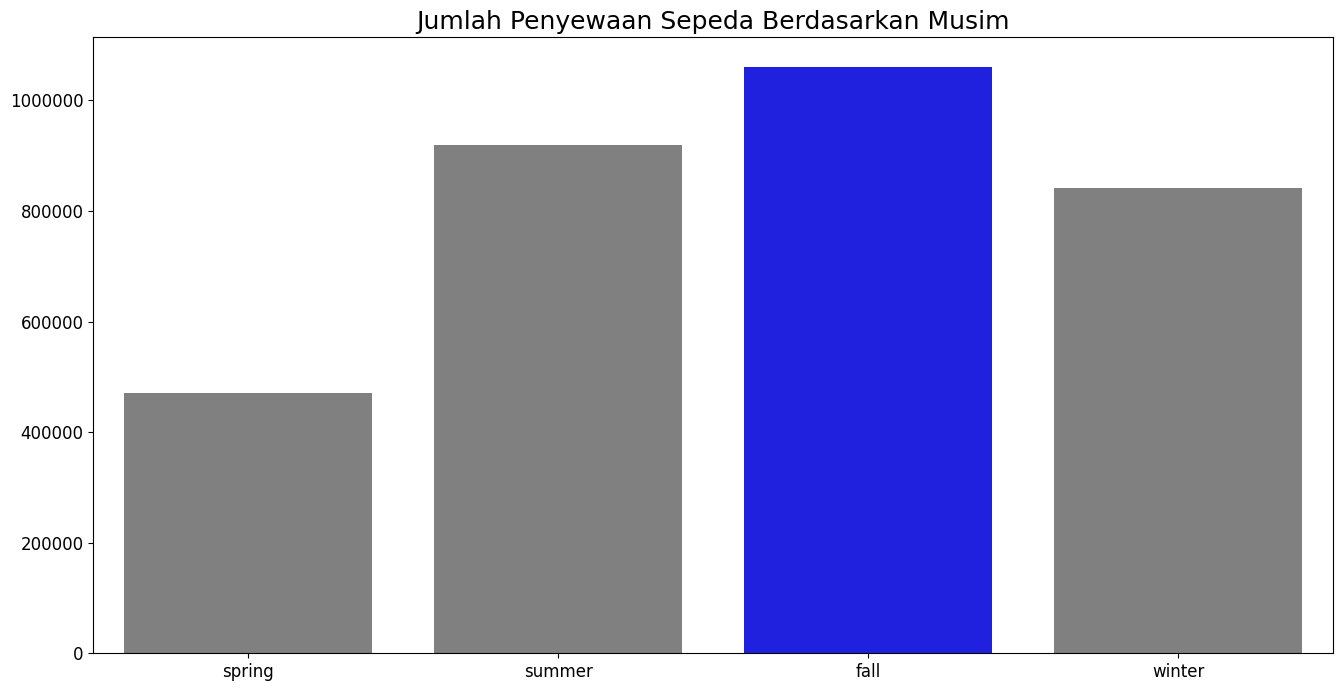

In [44]:
byseason_df = hourly_df.groupby(by='season').agg({
    'total': 'sum',
}).reset_index()

fig, ax = plt.subplots(figsize=(16,8))
colors = ['blue', 'grey', 'grey', 'grey']
sns.barplot(
    x='season',
    y='total',
    data=byseason_df,
    palette=colors,
    hue='season',
    legend=False,
    ax=ax,
    order=['spring','summer','fall','winter'],
)
ax.set_title('Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize=18)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.ticklabel_format(style='plain', axis='y')
plt.show

Visualisasi jumlah penyewaan dalam cuaca tertentu

<function matplotlib.pyplot.show(close=None, block=None)>

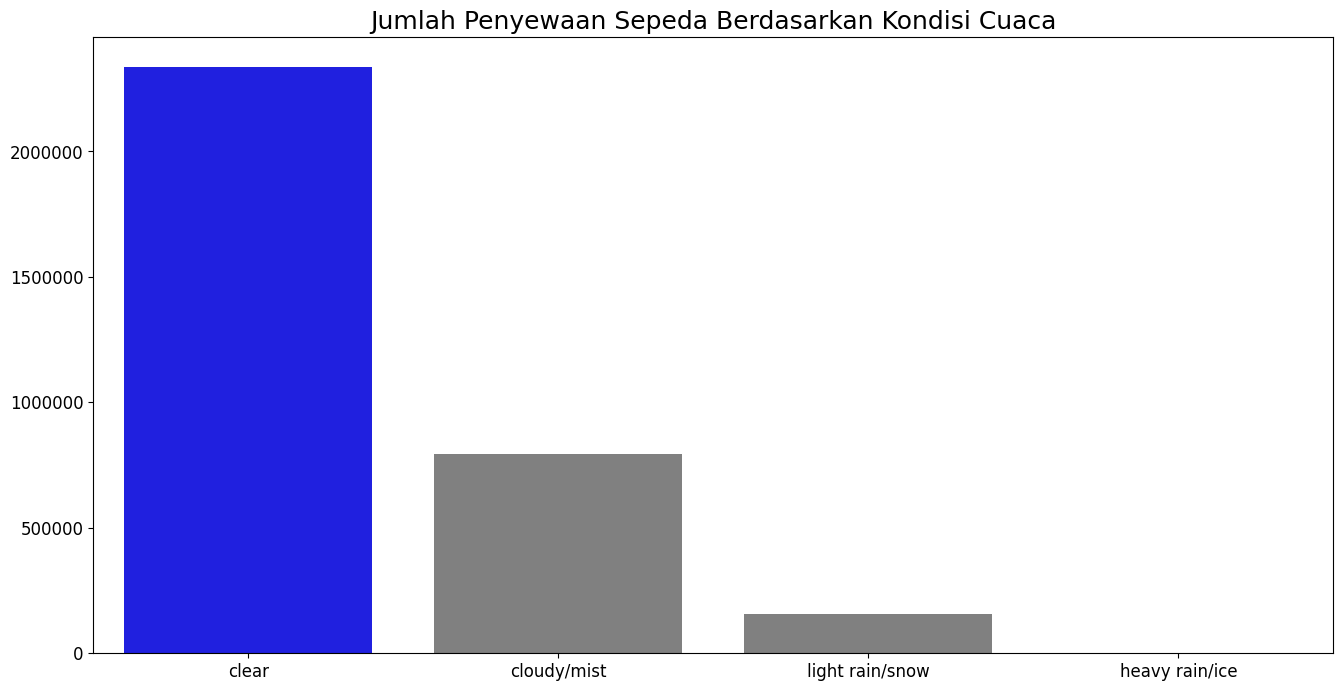

In [45]:
byweather_situation_df = hourly_df.groupby(by='weather_situation').agg({
    'total': 'sum',
}).reset_index()

fig, ax = plt.subplots(figsize=(16,8))
colors = ['blue', 'grey', 'grey', 'grey']
sns.barplot(
    x='weather_situation',
    y='total',
    data=byweather_situation_df,
    palette=colors,
    hue='weather_situation',
    legend=False,
    ax=ax,
    order=['clear','cloudy/mist','light rain/snow','heavy rain/ice'],
)
ax.set_title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=18)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.ticklabel_format(style='plain', axis='y')
plt.show

### Pertanyaan 2: Bagaimanakah perbandingan rental di hari kerja dan hari libur sampai sejauh ini?

Visualisasi perbandingan menggunakan mean

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

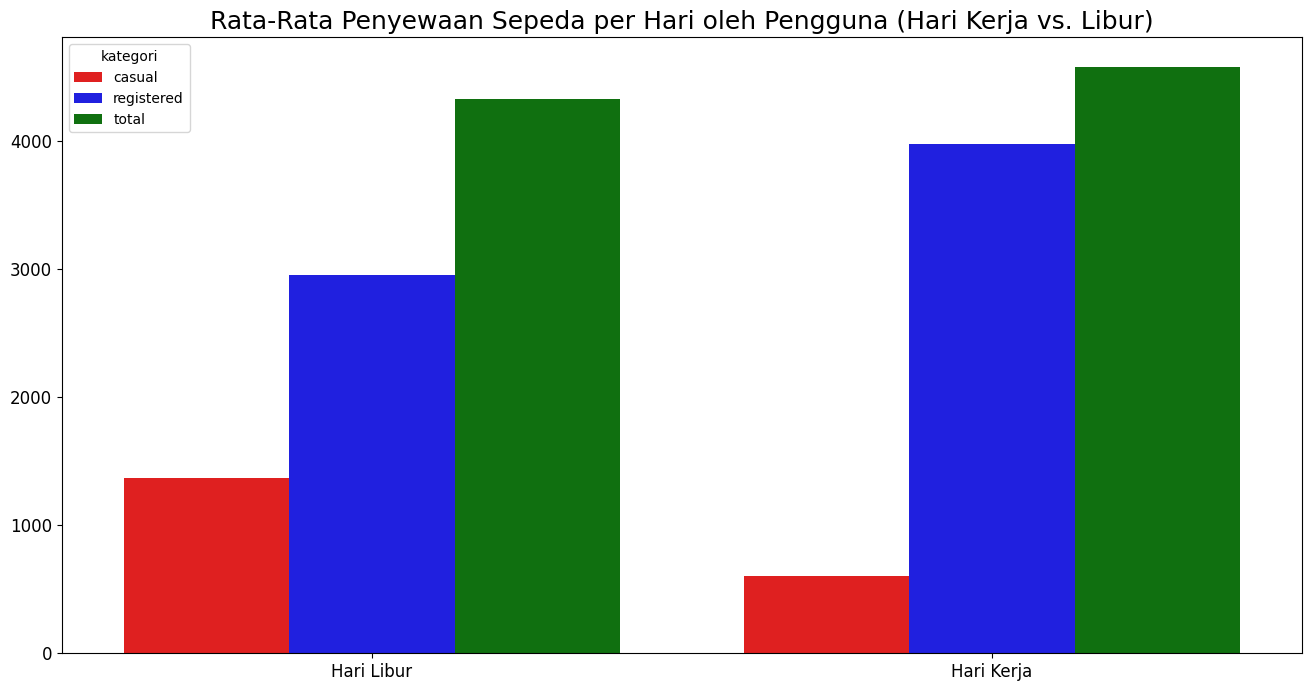

In [46]:
byworkingday_mean_df = daily_df.groupby(by='workingday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': 'mean',
}).reset_index()

byworkingday_mean_df = byworkingday_mean_df.melt(id_vars=['workingday'], var_name='kategori')

fig, ax = plt.subplots(figsize=(16,8))
colors = ['red', 'blue', 'green']
sns.barplot(
    x='workingday',
    y='value',
    data=byworkingday_mean_df,
    palette=colors,
    hue='kategori',
    legend=True,
    ax=ax,
)
ax.set_title('Rata-Rata Penyewaan Sepeda per Hari oleh Pengguna (Hari Kerja vs. Libur)', fontsize=18)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xticks([0,1], labels=['Hari Libur', 'Hari Kerja'])
plt.show
plt.legend

byworkingday_mean_df di melt supaya bisa kompatibel untuk membuat grouped bar chart. Setiap baris dataframe dijadikan kolom  
id_vars=['workingday'] membuat kolom workingday tidak diubah, karena kolom itu adalah kategori  
var_name='kategori' memberi nama legenda warna untuk chart (yaitu kategori)  

Visualisasi perbandingan menggunakan sum

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

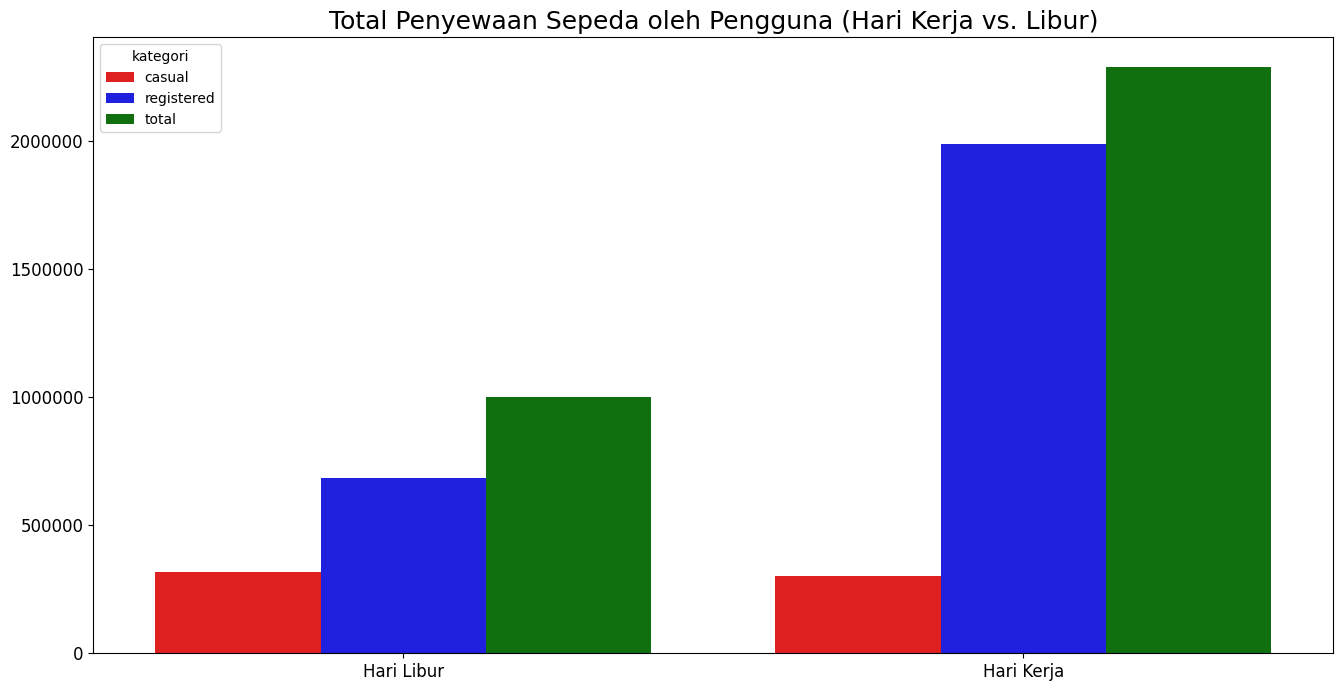

In [47]:
byworkingday_sum_df = daily_df.groupby(by='workingday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum',
}).reset_index()

byworkingday_sum_df = byworkingday_sum_df.melt(id_vars=['workingday'], var_name='kategori')

fig, ax = plt.subplots(figsize=(16,8))
colors = ['red', 'blue', 'green']
sns.barplot(
    x='workingday',
    y='value',
    data=byworkingday_sum_df,
    palette=colors,
    hue='kategori',
    legend=True,
    ax=ax,
)
ax.set_title('Total Penyewaan Sepeda oleh Pengguna (Hari Kerja vs. Libur)', fontsize=18)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xticks([0,1], labels=['Hari Libur', 'Hari Kerja'])
plt.show
plt.legend

**Insight:**
- Jumlah penyewaan berdasarkan musim antara fall (musim gugur), summer (musim panas), dan winter (musim salju) itu cukup kecil perbedaannya, lebih sedikit dari sekitar 20.000 perbedaan untuk ketiga musim
  - Musim spring (musim semi) walaupun bisa dianggap sebagai musim bagus untuk kegiatan diluar, memiliki total penyewaan lebih sedikit. Alasannya mungkin berada di faktor lingkungan lain
  - Sebaliknya, musim winter (musim saju) yang dianggap musim buruk untuk kegiatan diluar memiliki total penyewaan melebihi spring
- Jumlah penyeweaan berdasarkan cuaca didominasi oleh clear (cerah). Jumlah penyewaan di kondisi cuaca lain jauh lebih rendah dibanding clear
- **Jawaban dari pertanyaan 1 adalah musim gugur (fall) dan cuaca cerah (clear) menghasilkan jumlah penyewaan sepeda paling banyak selama ini**
- Jumlah rata rata penyewaan sepeda menunjukkan hasil hampir bertolak belakang antara penyewa casual dan penyewa registered
  - Rata rata penyewaan untuk penyewa casual lebih banyak di hari libur daripada hari kerja
  - Rata rata penyewaan untuk penyewa registered lebih banyak di hari kerja daripada hari libur
  - Ini menunjukkan kemungkinan penyewa casual kebanyakan menyewa pada hari libur sebagai bagian dari liburan mereka
  - Untuk penyewa registered, kemungkinan mereka menyewa sepeda untuk transportasi dari rumah ke tempat kerja, dan sebaliknya
  - Antara perbandingan rata rata, terlihat penyewa registered lebih tinggi daripada penyewa casual, bahkan di hari libur
- Jumlah total penyewaan sepeda menunjukkan kebanyakan penyewaan itu dilakukan oleh pengguna registered
  - Jumlah penyewaan oleh penyewa casual antara hari libur dan hari kerja terlihat hampir sama
  - Jumlah penyewaan oleh penyewa registered jauh lebih banyak di hari hari kerja daripada di hari libur
  - Mayoritas penyewaan di kedua jenis hari berasal dari penyewa registered
- **Jawaban dari pertanyaan 2 adalah hari kerja menghasilkan lebih banyak penyewaan, baik secara rata rata maupun total. Kebanyakan dari penyewaan tersebut berasal dari penyewa registered**

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Bagaimana pembagian total penyewaan sepeda antara pagi sampai malam? (Analisis lanjutan)

Untuk menjawab pertanyaan ini, teknik paling cocok seharusnya manual clustering, karena visualisasi data nantinya akan sulit dimengerti jika setiap jam (kolom hour) di representasikan. Jadi jam bisa dikelompokkan menjadi 4 kelompok waktu, pagi (morning), siang (afternoon), sore (evening), dan malam (night). Supaya pembagian tidak bias, maka setiap kategori harus memiliki jumlah jam yang sama rata, yaitu 6 jam untuk 1 kategori (24/4 = 6).

**Membuat kelompok berdasarkan waktu untuk analisis clustering**

In [48]:
hourly_df['hourtime_cluster'] = hourly_df['hour'].apply(
    lambda x:
    'morning' if x >= 5 and x < 11 else 'afternoon' if x >= 11 and x < 17 else 'evening' if x >= 17 and x < 23 else 'night'
)

Mengecek hasil clustering

In [49]:
hourly_df.head(50)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,feeling_temp,humidity,windspeed,casual,registered,total,hourtime_cluster
0,1,2011-01-01,spring,0,1,0,False,Saturday,False,clear,0.24,0.2879,0.81,0.0000,3,13,16,night
1,2,2011-01-01,spring,0,1,1,False,Saturday,False,clear,0.22,0.2727,0.80,0.0000,8,32,40,night
2,3,2011-01-01,spring,0,1,2,False,Saturday,False,clear,0.22,0.2727,0.80,0.0000,5,27,32,night
3,4,2011-01-01,spring,0,1,3,False,Saturday,False,clear,0.24,0.2879,0.75,0.0000,3,10,13,night
4,5,2011-01-01,spring,0,1,4,False,Saturday,False,clear,0.24,0.2879,0.75,0.0000,0,1,1,night
5,6,2011-01-01,spring,0,1,5,False,Saturday,False,cloudy/mist,0.24,0.2576,0.75,0.0896,0,1,1,morning
6,7,2011-01-01,spring,0,1,6,False,Saturday,False,clear,0.22,0.2727,0.80,0.0000,2,0,2,morning
7,8,2011-01-01,spring,0,1,7,False,Saturday,False,clear,0.20,0.2576,0.86,0.0000,1,2,3,morning
8,9,2011-01-01,spring,0,1,8,False,Saturday,False,clear,0.24,0.2879,0.75,0.0000,1,7,8,morning
9,10,2011-01-01,spring,0,1,9,False,Saturday,False,clear,0.32,0.3485,0.76,0.0000,8,6,14,morning


Disini saya menyadari bahwa ada jam yang hilang, dan setelah mengecek, ternyata sampai beberapa baris yang hilang. Tapi dari index (kolom index, bukan index dari dataframe), terlihat bahwa baris yang hilang juga tidak dicatat, misal di index 49 dan 50, terlihat bahwa hour di index 49 itu 1, lalu melompat langsung ke 4 di index 50

In [50]:
hourly_df['hour'].count()

np.int64(17379)

In [51]:
hourly_df['hour'].value_counts()

hour
16    730
17    730
15    729
14    729
13    729
12    728
18    728
19    728
20    728
21    728
22    728
23    728
8     727
9     727
10    727
7     727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

Setelah pengecekan dan pertimbangan, saya memutuskan bahwa baris yang hilang tidak bisa di isi secara akurat, dan karena jumlah data yang hilang tidak banyak, saya melanjutkan dengan analisis

**Mencari hubungan setiap cluster hourtime_cluster dengan total, menggunakan sum untuk menemukan kelompok waktu dengan sewa paling banyak**

In [52]:
hourly_df.groupby(by='hourtime_cluster').agg({
    'total': 'sum'
}).reset_index()

,hourtime_cluster,total
0,afternoon,1107202
1,evening,1259028
2,morning,770260
3,night,156189


<function matplotlib.pyplot.show(close=None, block=None)>

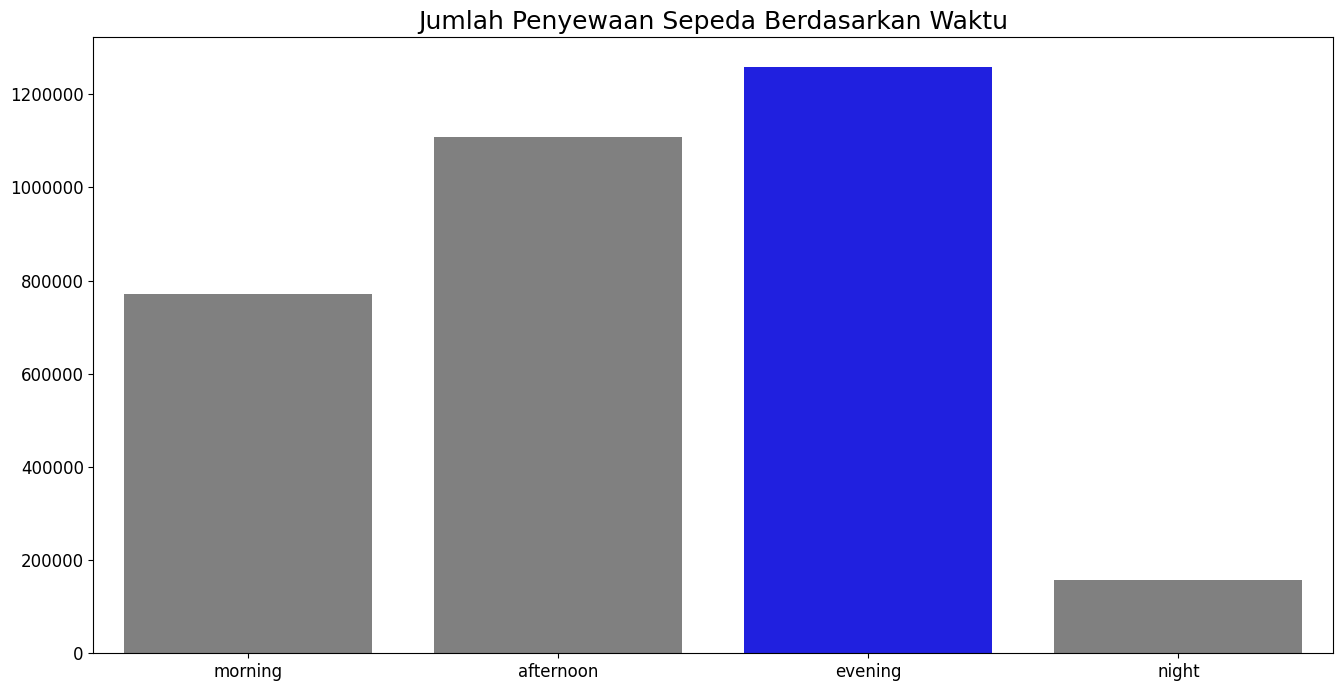

In [53]:
byhourtime_cluster_df = hourly_df.groupby(by='hourtime_cluster').agg({
    'total': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(16,8))
colors = ['grey', 'blue', 'grey', 'grey']
sns.barplot(
    x='hourtime_cluster',
    y='total',
    data=byhourtime_cluster_df,
    palette=colors,
    hue='hourtime_cluster',
    legend=False,
    ax=ax,
    order=['morning','afternoon','evening','night'],
)
ax.set_title('Jumlah Penyewaan Sepeda Berdasarkan Waktu', fontsize=18)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.ticklabel_format(style='plain', axis='y')
plt.show

**Insight:**
- Jumlah penyewaan paling banyak terjadi di waktu siang (afternoon) dengan sekitar 1.200.000 penyewaan dan sore (evening) dengan sekitar 1.100.000 penyewaan
  - Jumlah pada waktu pagi (morning) yang lebih sedikit dibanding siang dan sore mungkin berarti penyewa tidak memakai sepeda untuk pergi ke tempat kerja/aktivitas
  - Bisa jadi jumlah penyewaan tinggi di siang dan sore karena sepeda digunakan untuk berpergian antar tempat aktivitas
- Jumlah penyewaan paling sedikit pada malam hari (night), tidak sampai 20.000 sewa
- **Jawaban dari pertanyaan 3 adalah total penyewaan dari pagi sampai malam paling banyak pada waktu siang dan sore**

## Conclusion

- Musim gugur (fall) dan cuaca cerah (clear) menghasilkan jumlah penyewaan sepeda paling banyak selama in
- Hari kerja menghasilkan lebih banyak penyewaan, baik secara rata rata maupun total. Kebanyakan dari penyewaan tersebut berasal dari penyewa registered
- Total penyewaan dari pagi sampai malam paling banyak pada waktu siang (afternoon) dan sore (evening)

**Ubah dataframe yang sudah di cleaning dan di analisis menjadi csv lagi**

In [54]:
daily_df.to_csv('cleaned_day.csv')
hourly_df.to_csv('cleaned_hour.csv')